In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking/benchmark_output/motivation/rep-enh-gpu")

In [3]:
s3_folder_filter="*s3*"
scratch_folder_filter="*scratch*"

Load the data

In [4]:
df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 158.34it/s]


Create "colors" and "lanes". Colors are used to distinguish different function types, e.g. function that loads a batch, calls the `next_data`, `run_traning_batch` from Lightning and `training_batch_to_device` also from lightning.
Lanes, every single call of the aforementioned funcitons in their own respective lane, so we get a nice overview of when the function is called, and how long it tookl

Extract the GPU Utilization data

In [5]:
df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter, ms=True, skip=8)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [01:08<00:00,  2.52s/it]


In [6]:
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter, ms=True, skip=8)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.91it/s]


### Plot function timelines for remote storage (AWS S3)

In [44]:
font_size=30
params = {'legend.fontsize': font_size,
          'figure.figsize': (25, 20),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size}

timestamp_2 True
71.75079149706015 41.055847255369926


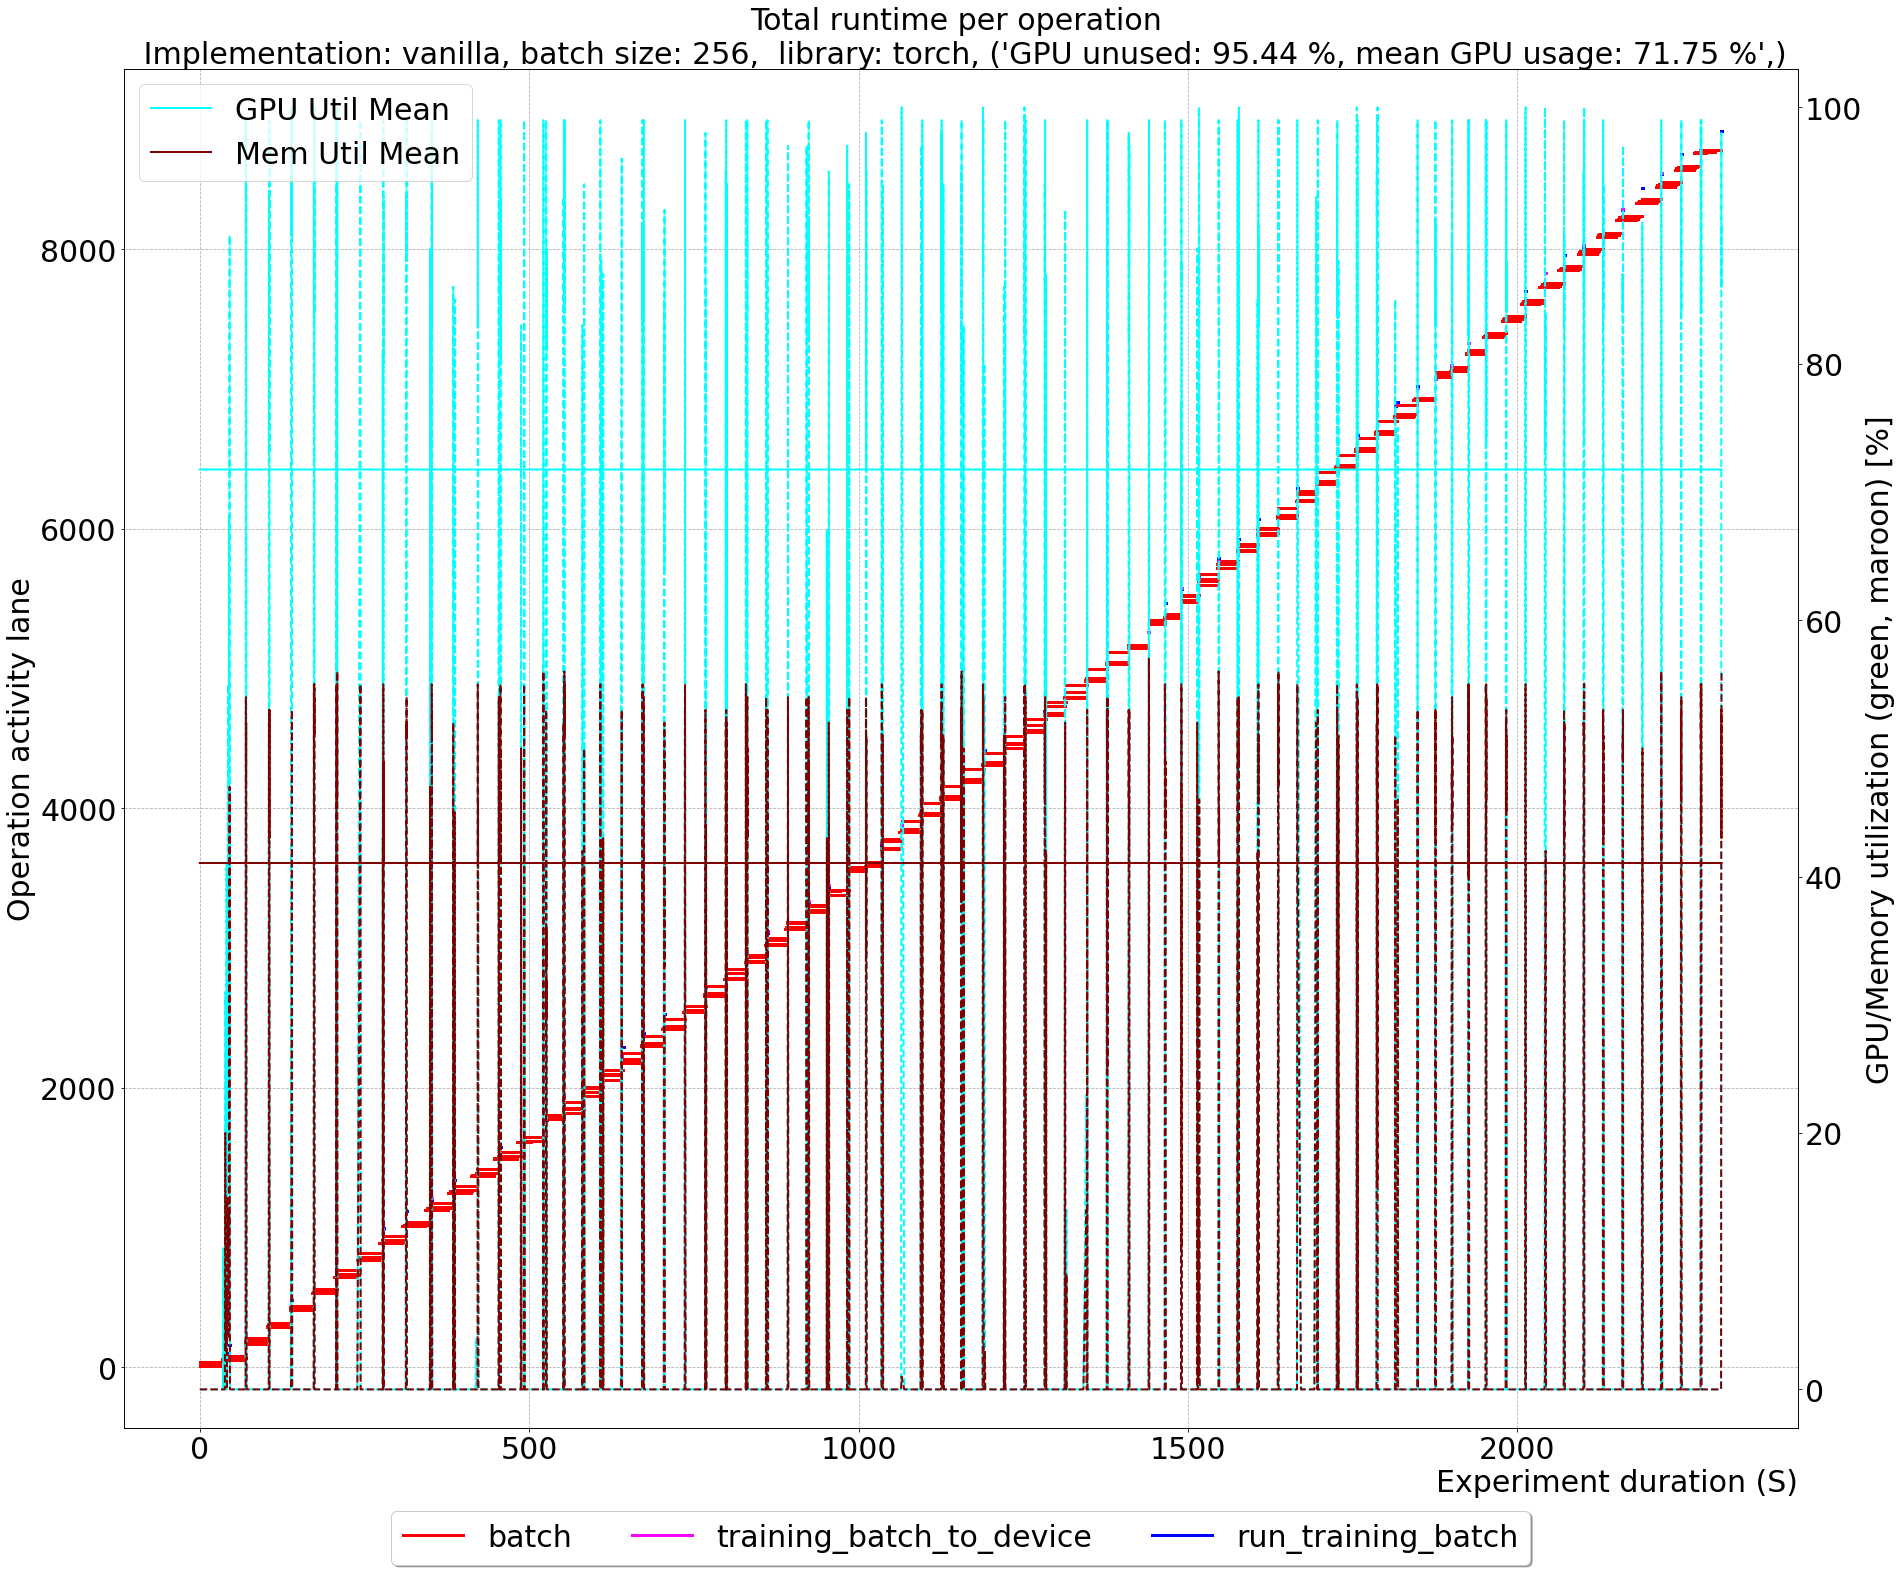

timestamp_2 True
65.28030509397985 19.189587721938008


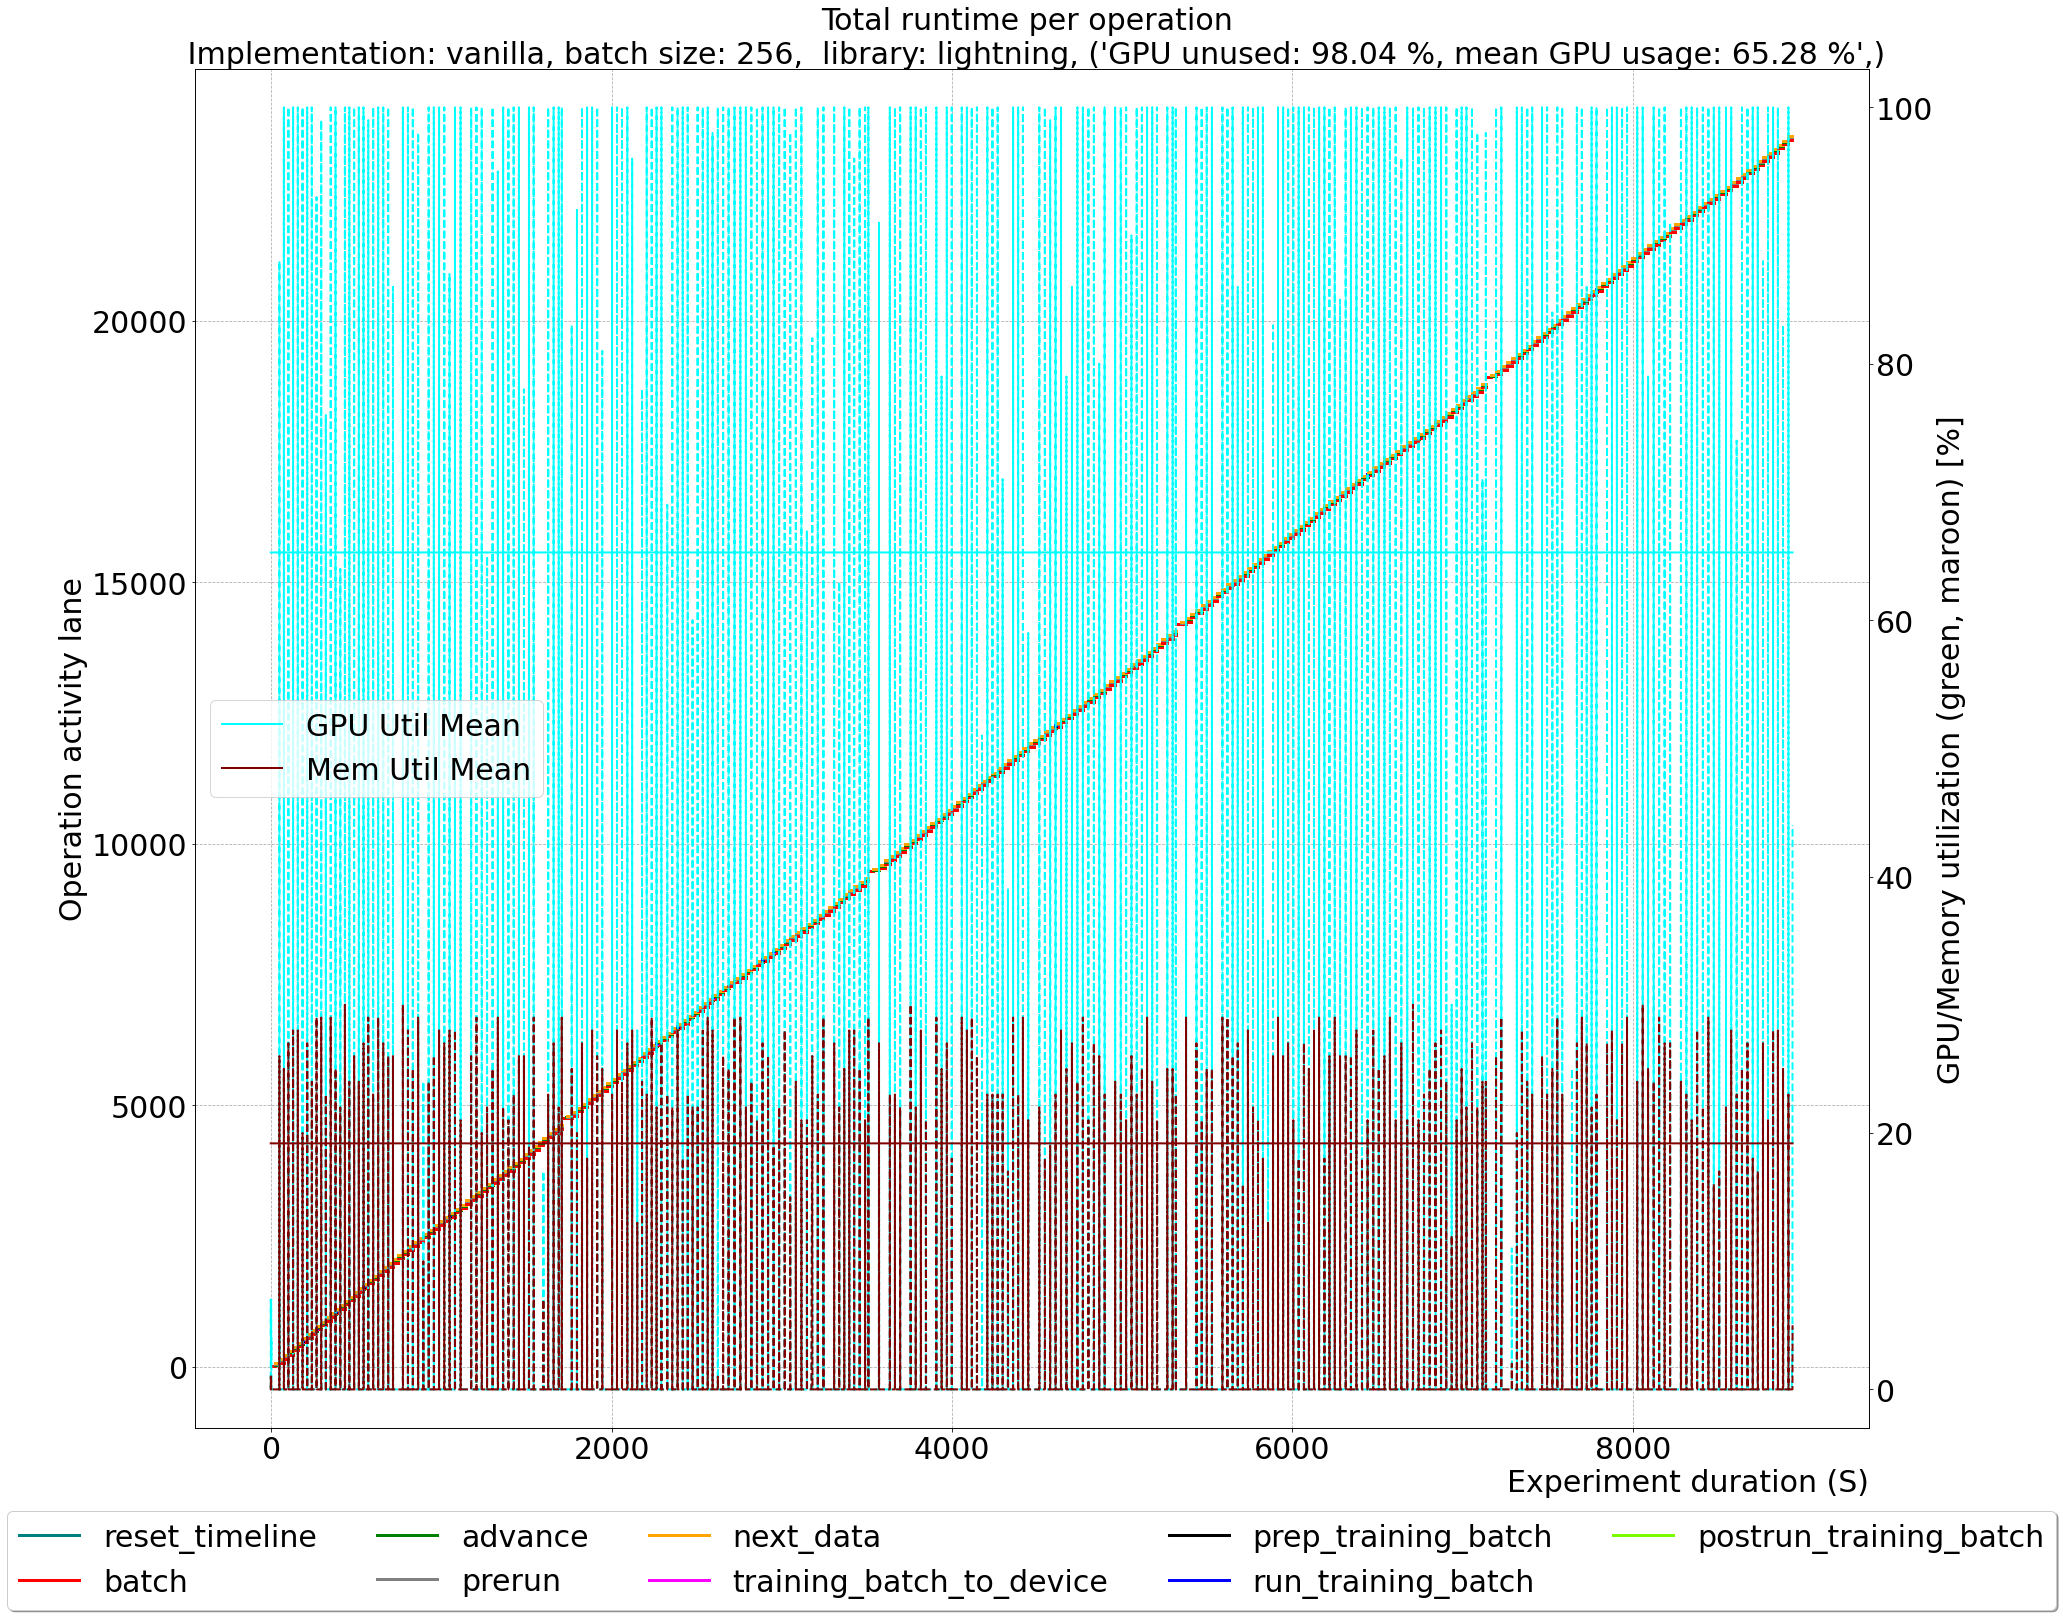

In [45]:
unique_runs_s3, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_s3)
returns_s3 = []

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=False, zoom_epochs=2,
                                     skip_plot=False, ms=True)
    result["run"]=run
    returns_s3.append(result)

### Plot function timelines for local storage

timestamp_2 True
74.78413284132841 41.832692307692305


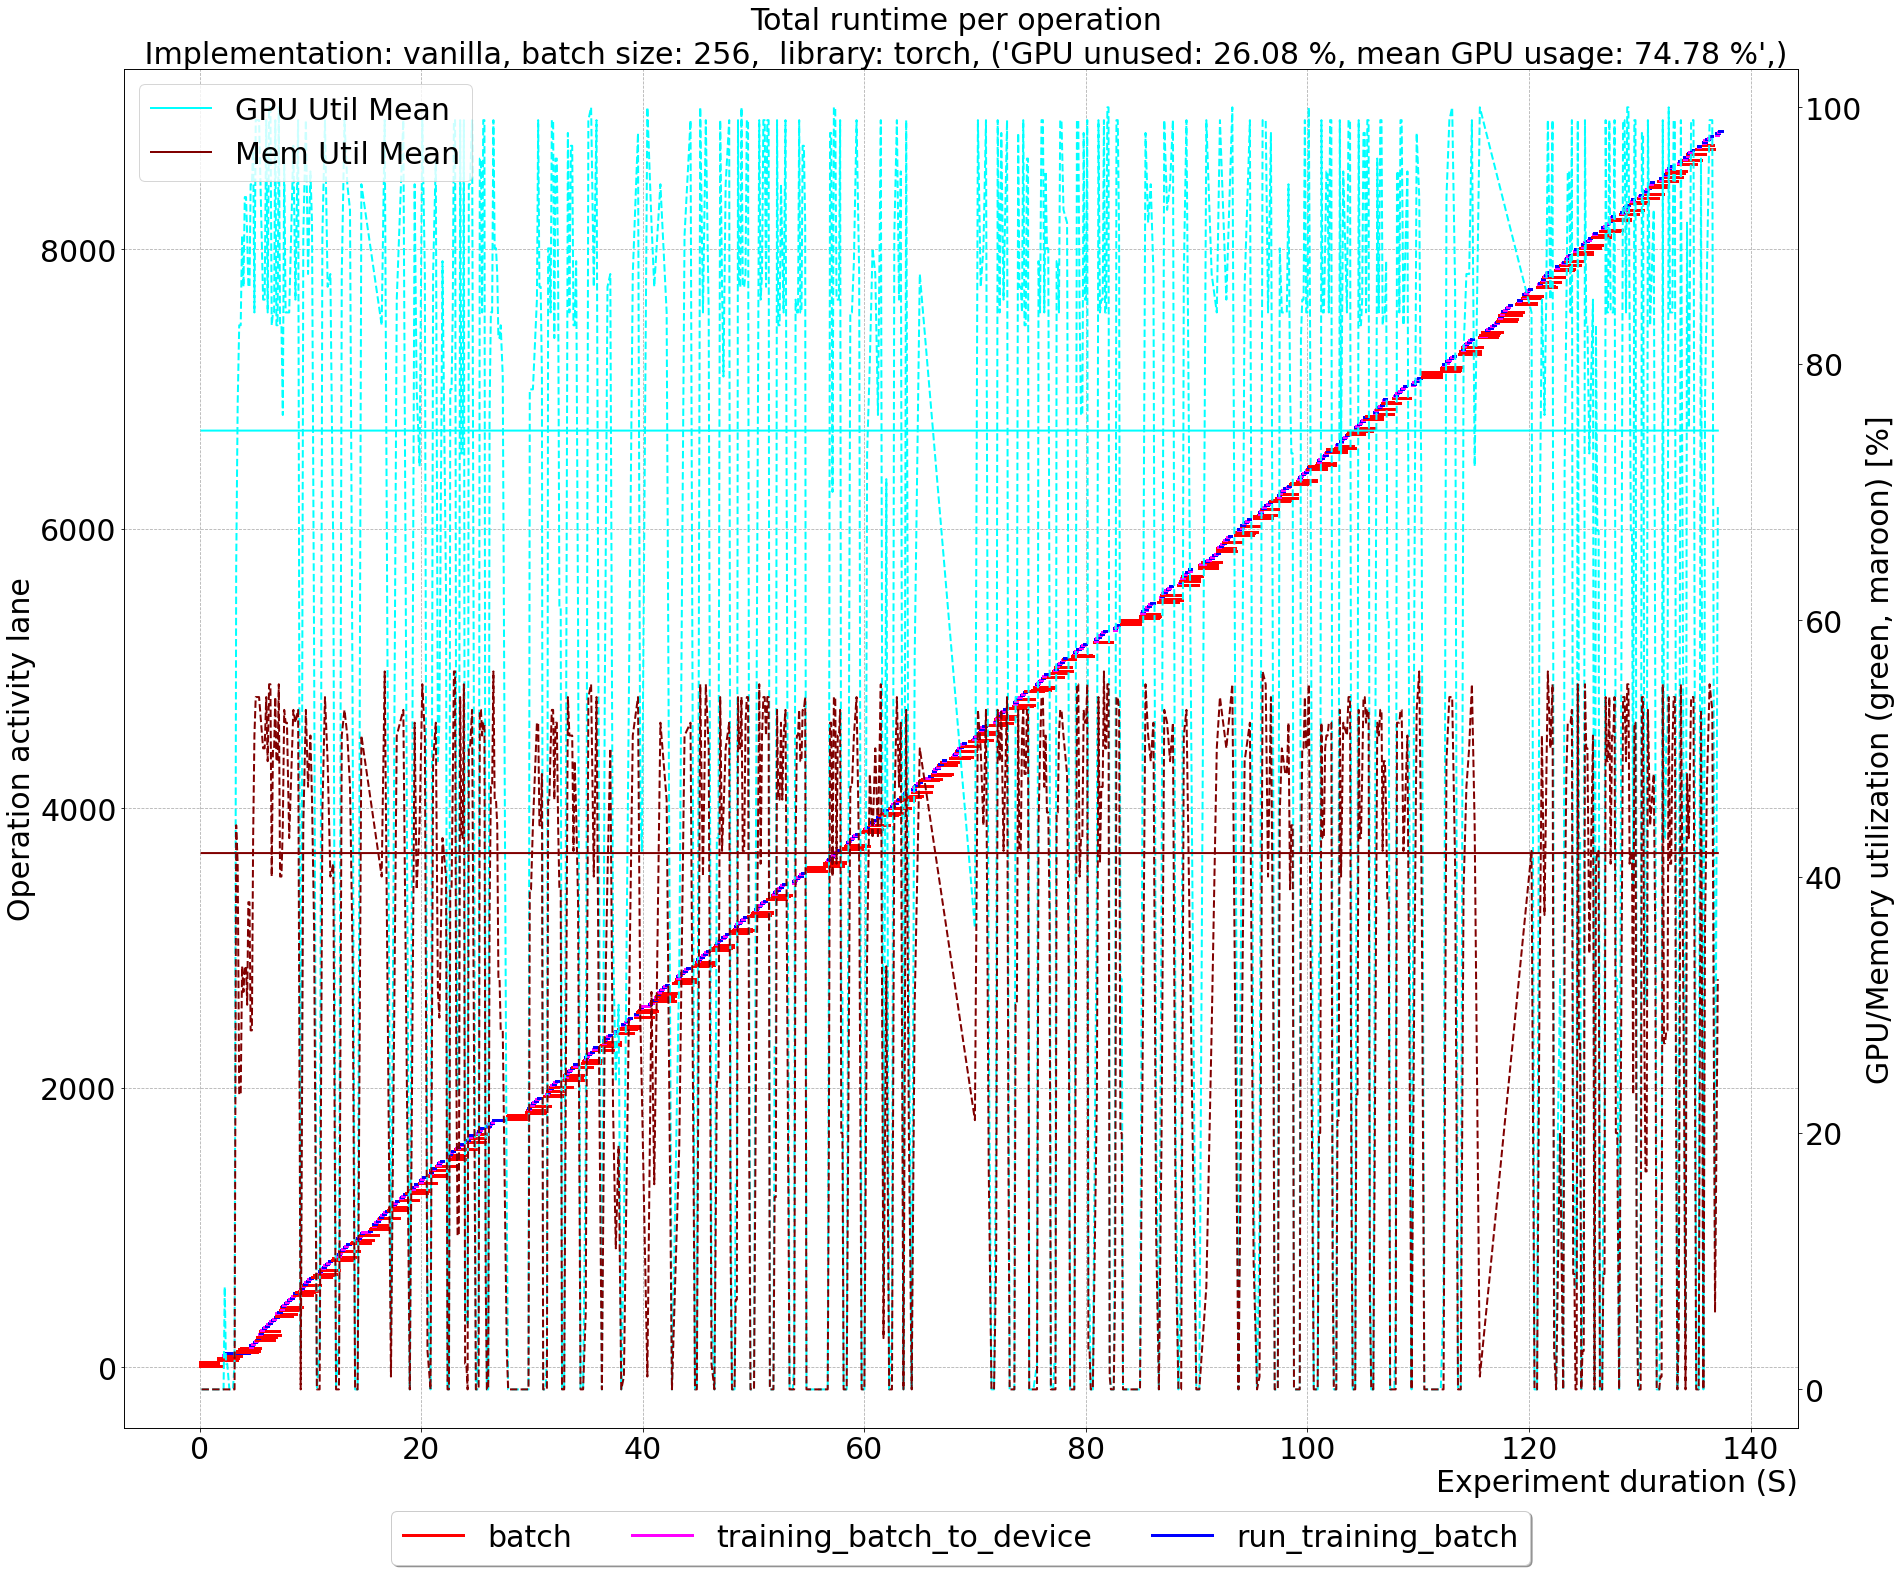

timestamp_2 True
64.67509336397588 18.926790785736827


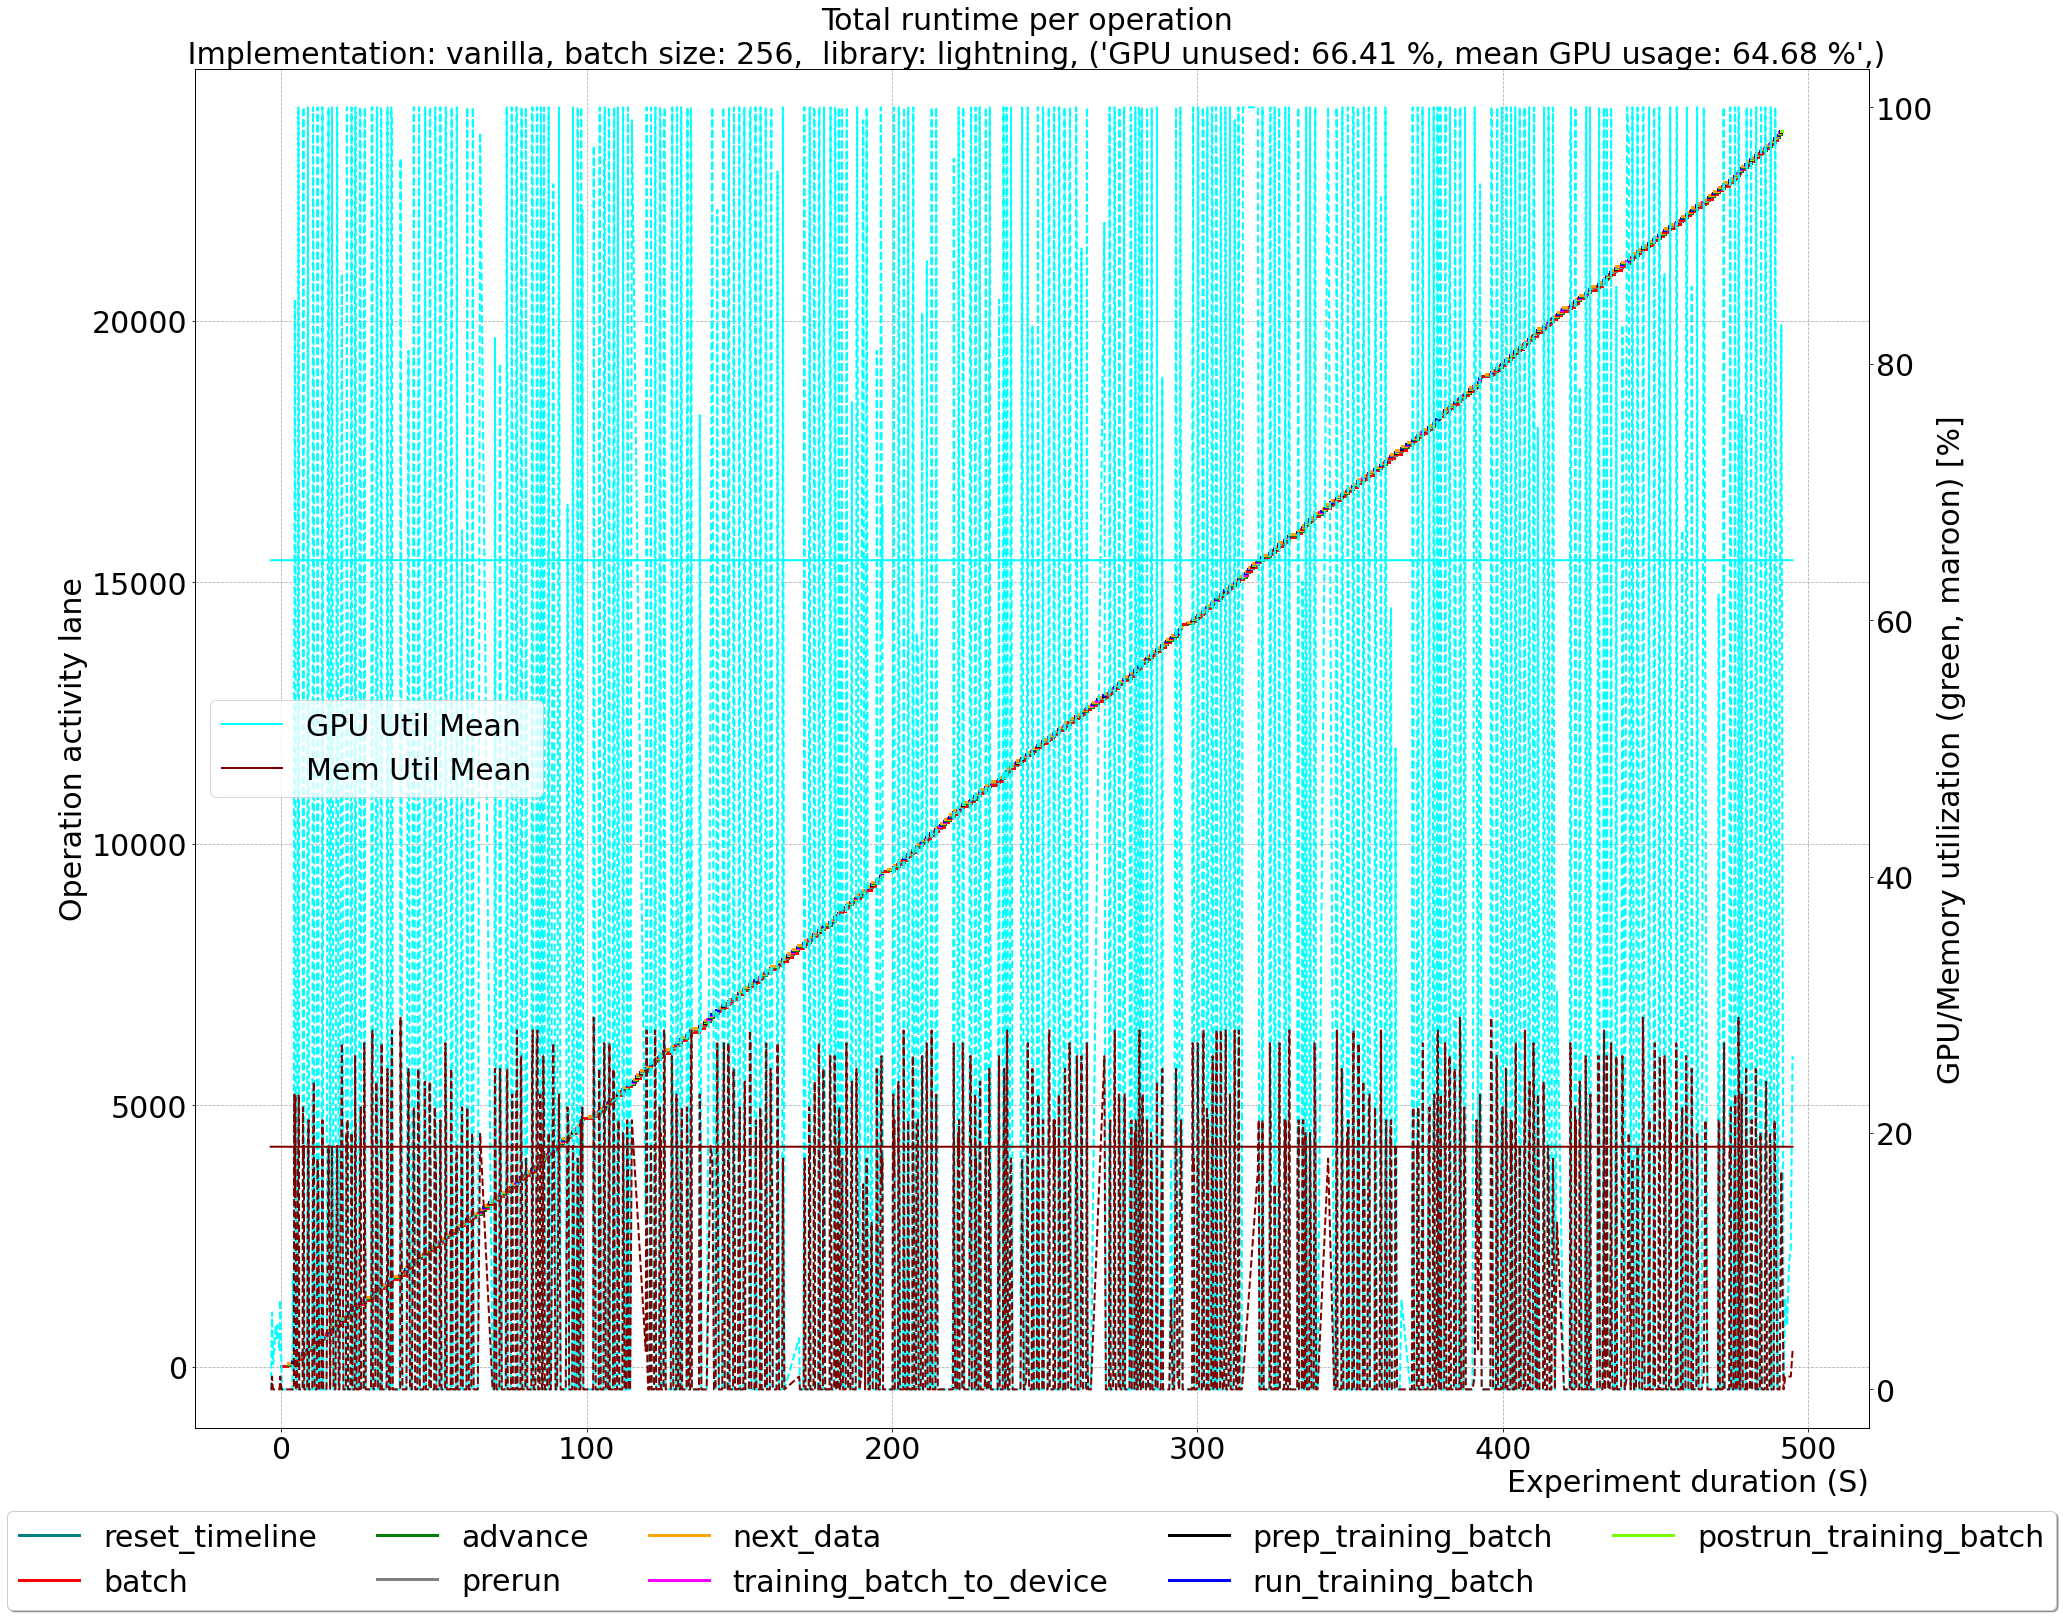

In [46]:
unique_runs_scratch, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_scratch)
returns_scratch = []

for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False)
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=False, zoom_epochs=2,
                                     skip_plot=False, ms=True)
    result["run"]=run
    returns_scratch.append(result)

Get unique runs to loop through, and plot the results

### Result tables
Print throughput in loaded images per second, and function duration in seconds, for S3 and Scratch

In [47]:
# sanity check
get_metadata_info(output_base_folder / "" / unique_runs_s3[0])

Dataset:  15000
Batch size: 256
Epochs:  5
Images total:  75000
Batches per epoch 59
Images total (rounded):  75520


(15000, 256, 5, 75000, 59, 75520)

In [48]:
df_full_s3 = extract_pandas(output_base_folder, folder_filter=s3_folder_filter)
results_s3 = pd.DataFrame.from_records(data=returns_s3)
r_s3 = get_throughput(results_s3, "", df_full_s3, unique_runs_s3, output_base_folder)
r_s3

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:05<00:00,  4.98it/s]


runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
0  2309.994297      95.441989               71.750791       1.773151   
1  8934.938077      98.040252               65.280305       0.340417   

   mem_util_mean_no_zeros implementation cache    library                fig  \
0               41.055847        vanilla     1      torch  Figure(2160x1800)   
1               19.189588        vanilla     1  lightning  Figure(2160x1800)   

   throughput        dl_MB   imgs     Mbit/s      MB/s  
0   32.467613  8464.628749  75000  29.314804  3.664350  
1    8.394015  8464.628749  75000   7.578903  0.947363

In [49]:
df_full_scratch = extract_pandas(output_base_folder, folder_filter=scratch_folder_filter)
results_scratch = pd.DataFrame.from_records(data=returns_scratch)
r_scratch = get_throughput(results_scratch, "", df_full_scratch, unique_runs_scratch, output_base_folder)
r_scratch

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:06<00:00,  4.37it/s]


runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
0  137.243011      26.082509               74.784133      29.666553   
1  491.064960      66.406099               64.675093       5.788361   

   mem_util_mean_no_zeros implementation cache    library                fig  \
0               41.832692        vanilla     1      torch  Figure(2160x1800)   
1               18.926791        vanilla     1  lightning  Figure(2160x1800)   

   throughput        dl_MB   imgs      Mbit/s       MB/s  
0  546.475914  8456.771183  75000  492.951655  61.618957  
1  152.729285  8456.771183  75000  137.770305  17.221288

In [50]:
import os
store_path = "images"
if not os.path.exists(store_path):
    os.makedirs(store_path)
    
# for i in range(len(r)):
#     r["fig"][i].savefig(f"images/{time.time()}_{i}_{r_scratch['implementation'][0]}_{r_scratch['library'][0]}.pdf, bbox_inches='tight')


timestamp_2 True
62.52459016393443 35.10909090909091


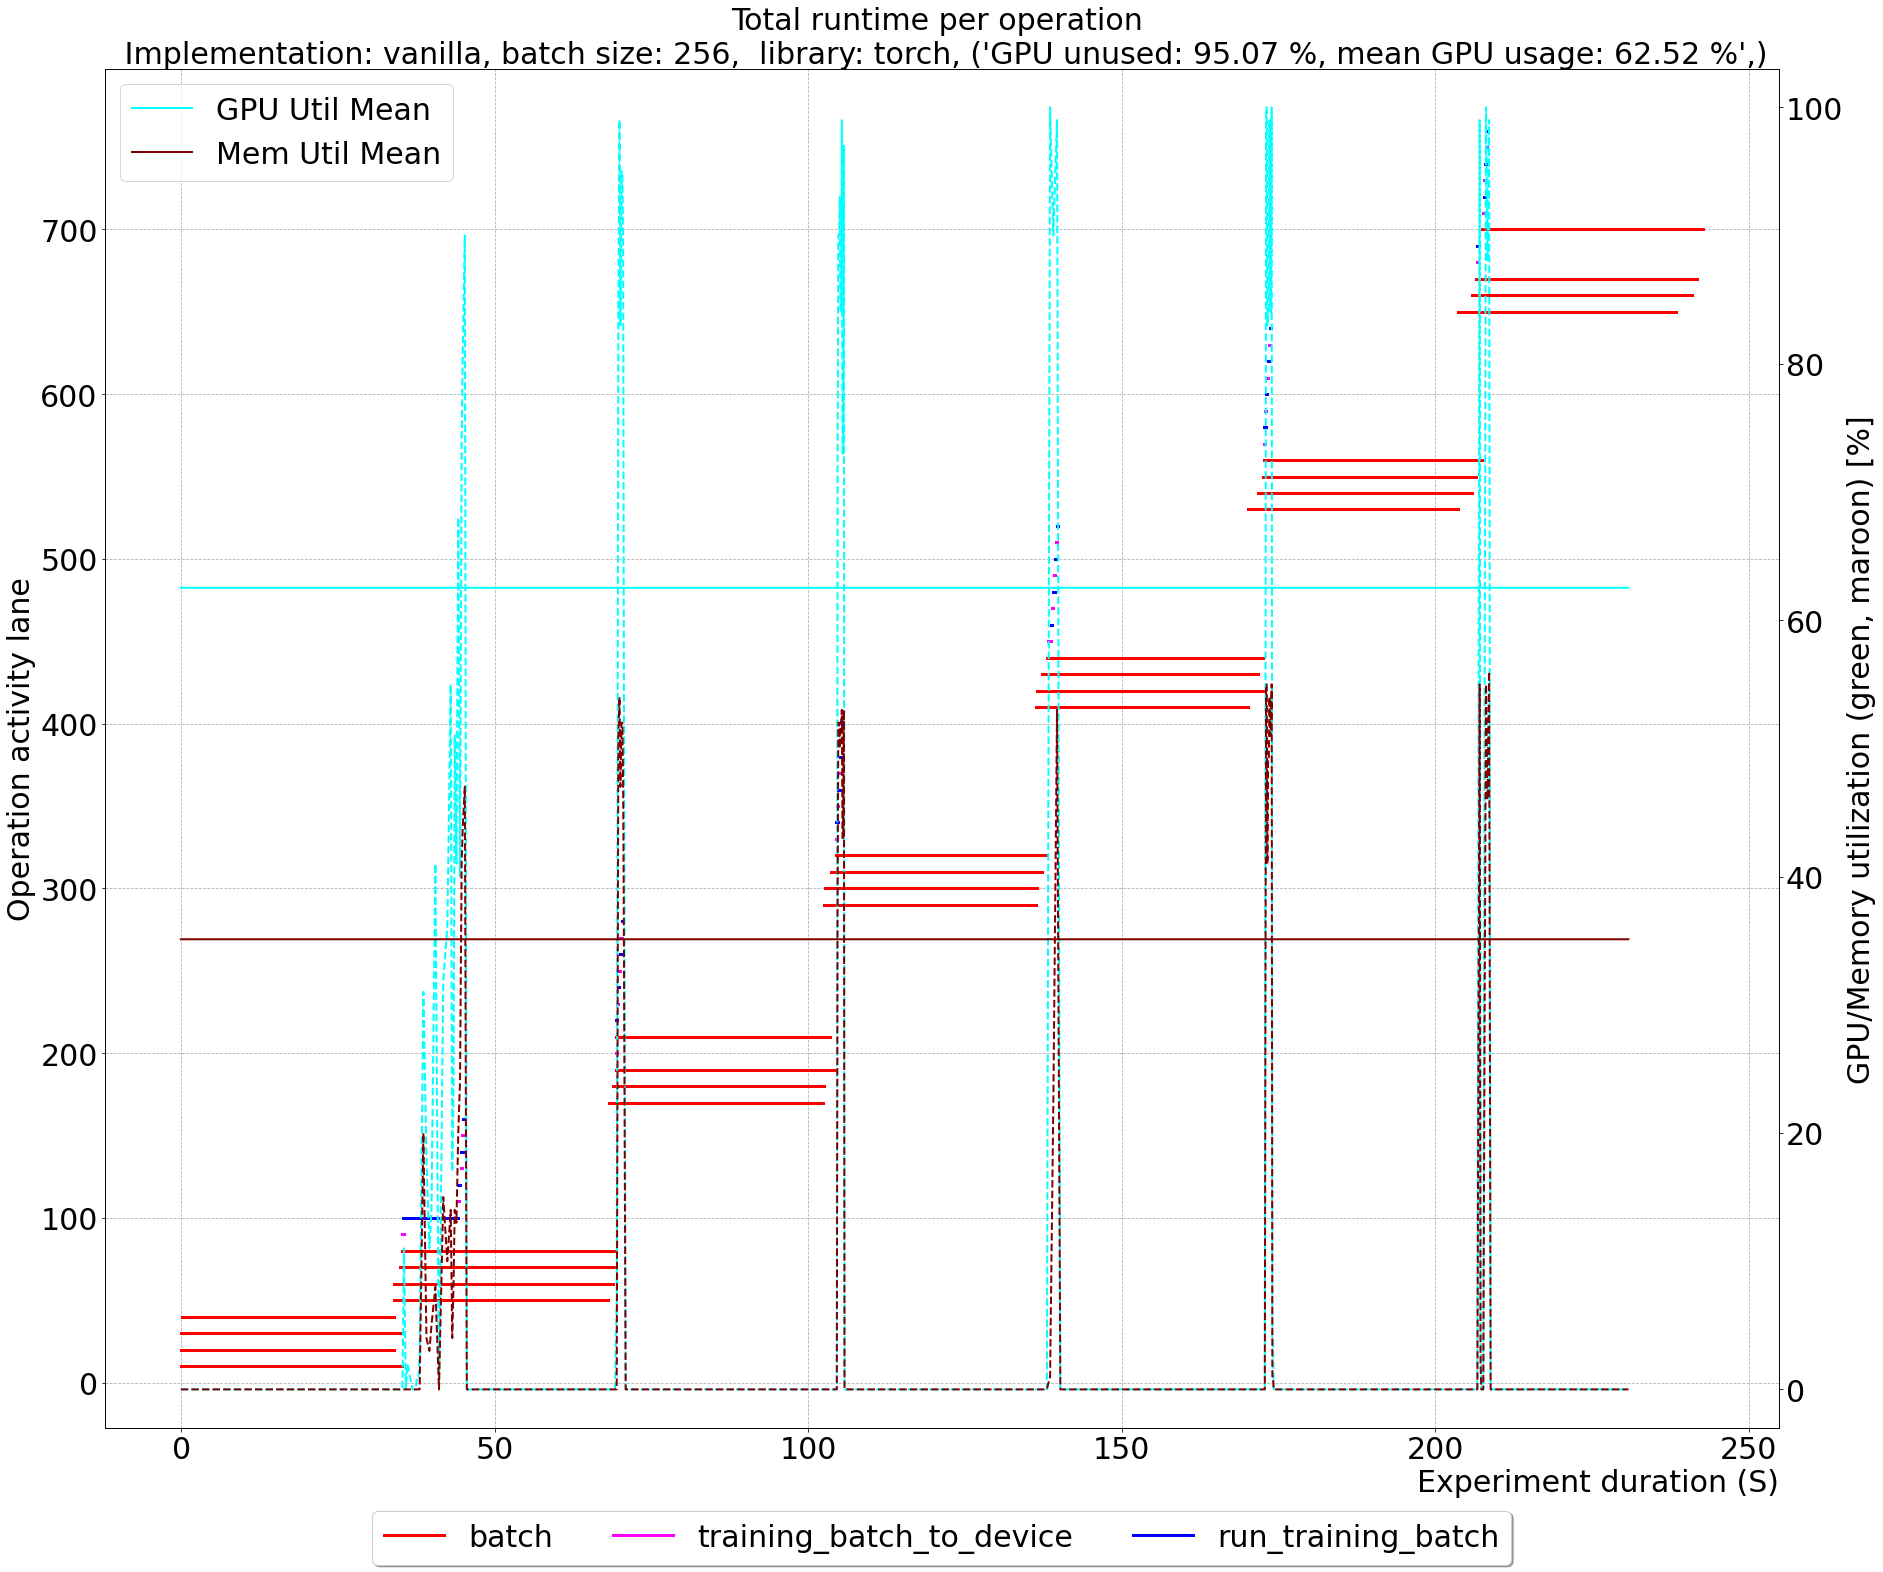

timestamp_2 True
54.95238095238095 19.19148936170213


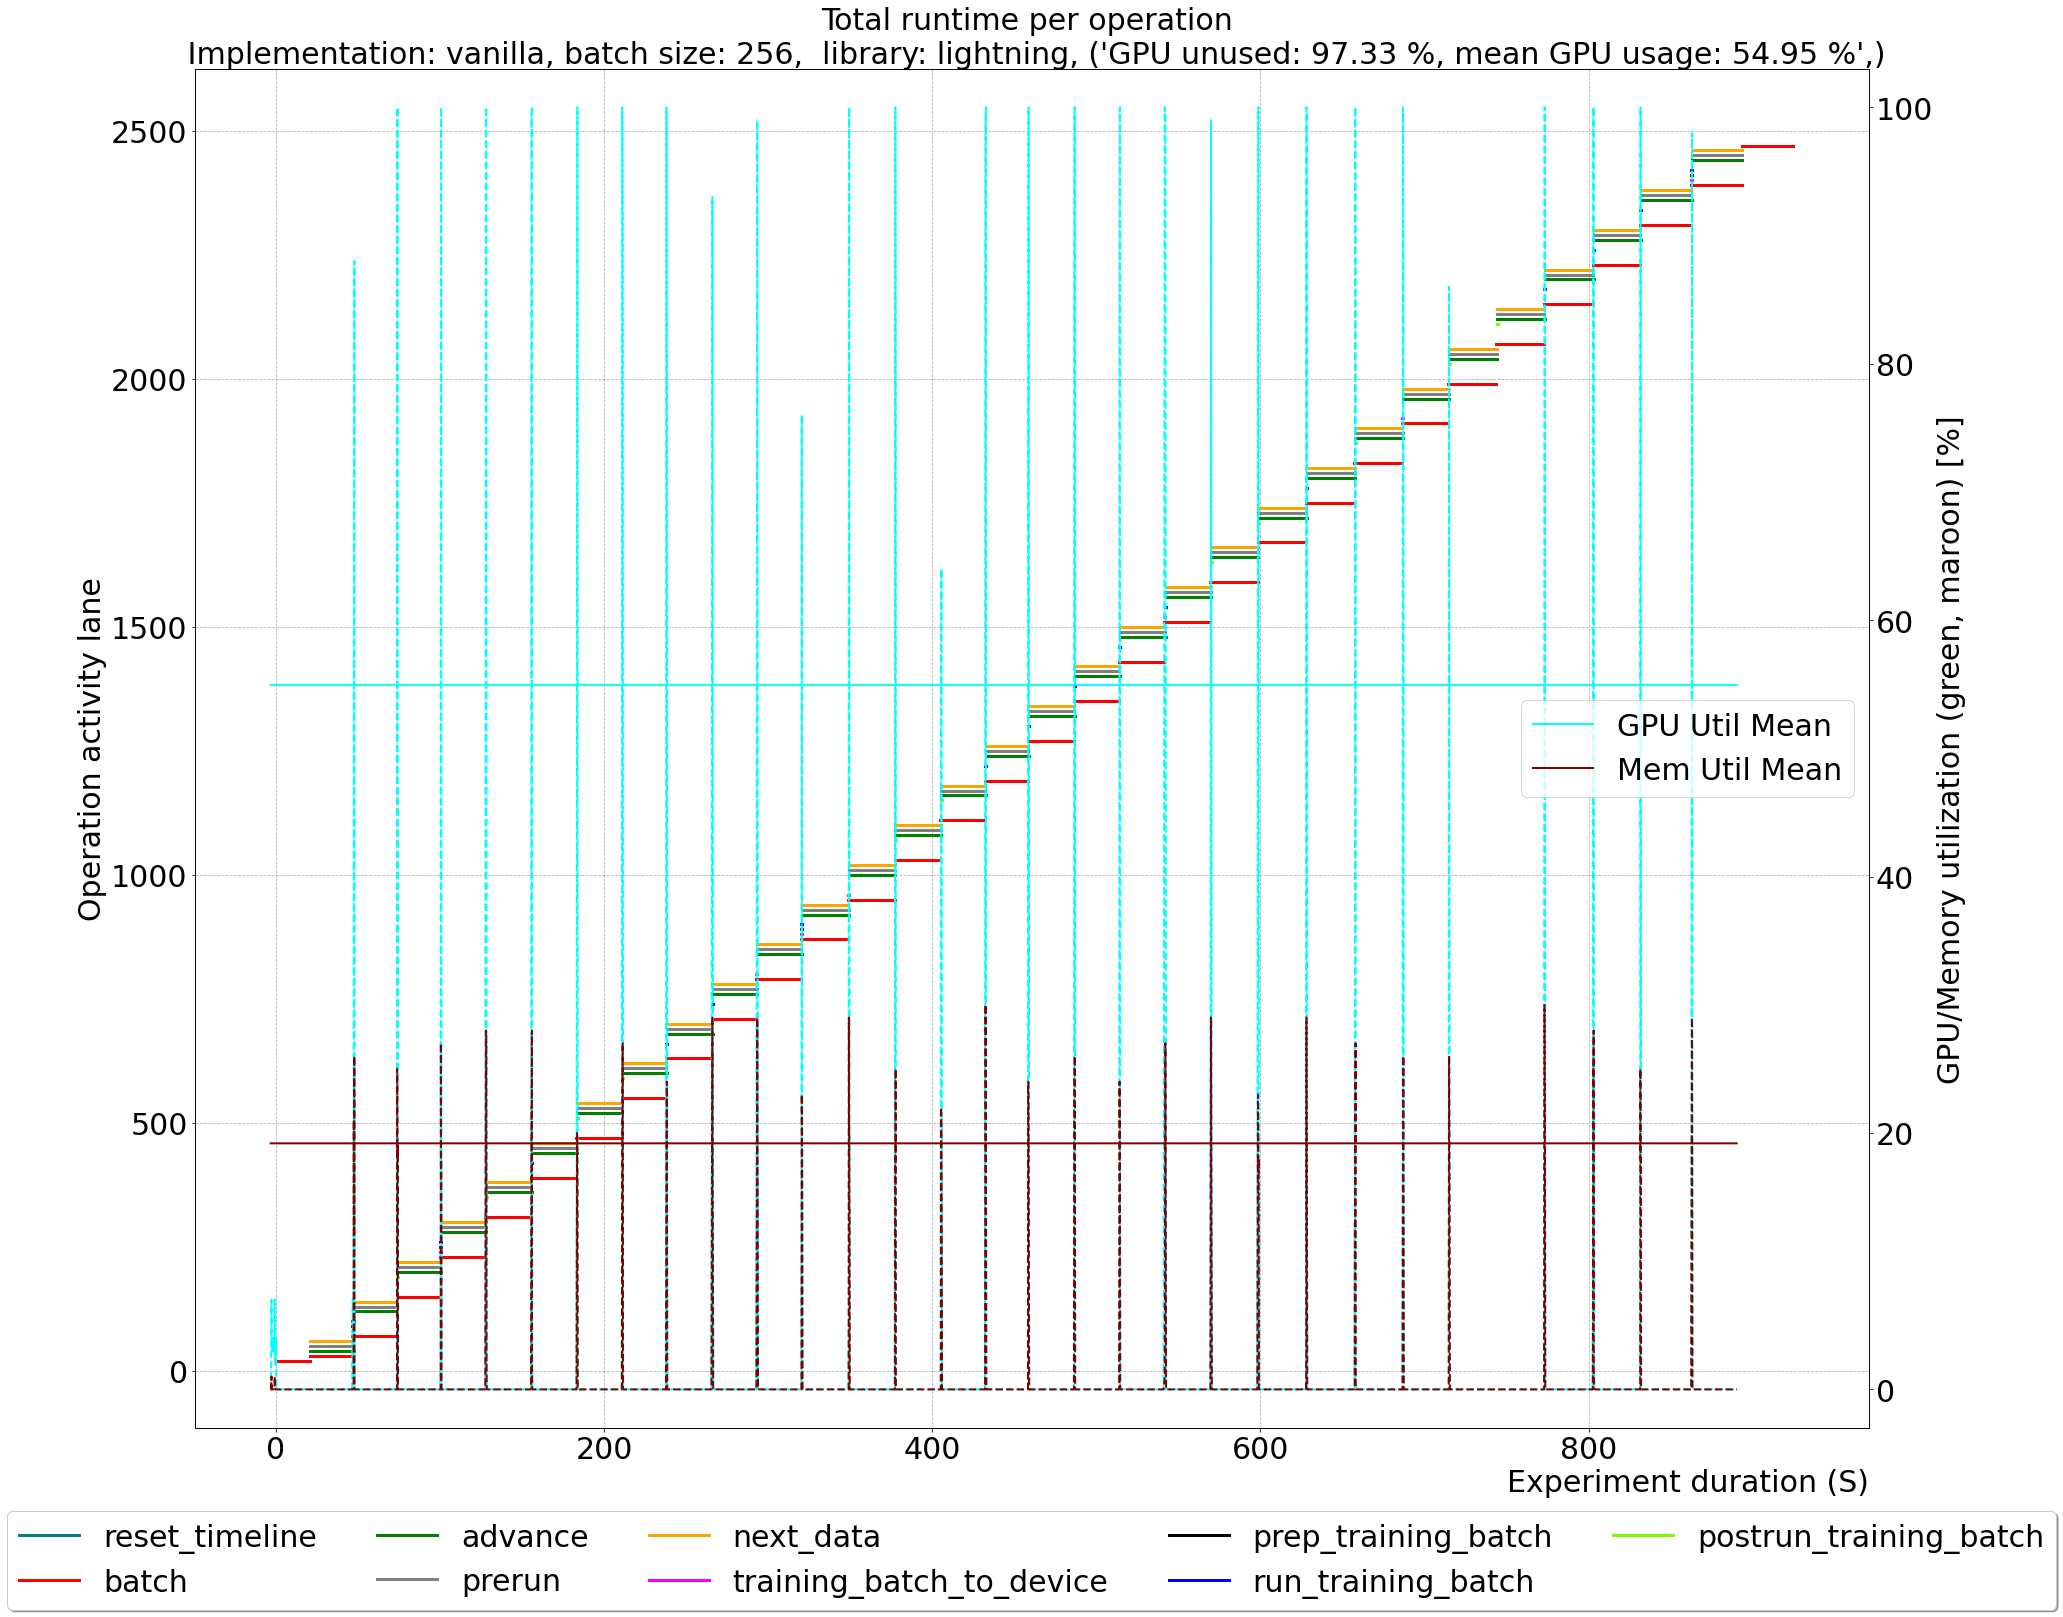

In [51]:
# zoomed

returns_s3 = []

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=True, zoom_epochs=2,
                                     skip_plot=False, ms=True)
    result["run"]=run
    returns_s3.append(result)

In [52]:

returns_s3[0]["fig"].savefig(f"images/s3_motivation_zoom.pdf", bbox_inches='tight')
r_s3['fig'][0].savefig(f"images/s3_motivation.pdf", bbox_inches='tight')

#  = returns_s3[0]["fig"].legend(prop={"size":40})
# r_s3['fig'][0]
